4.04 10.37


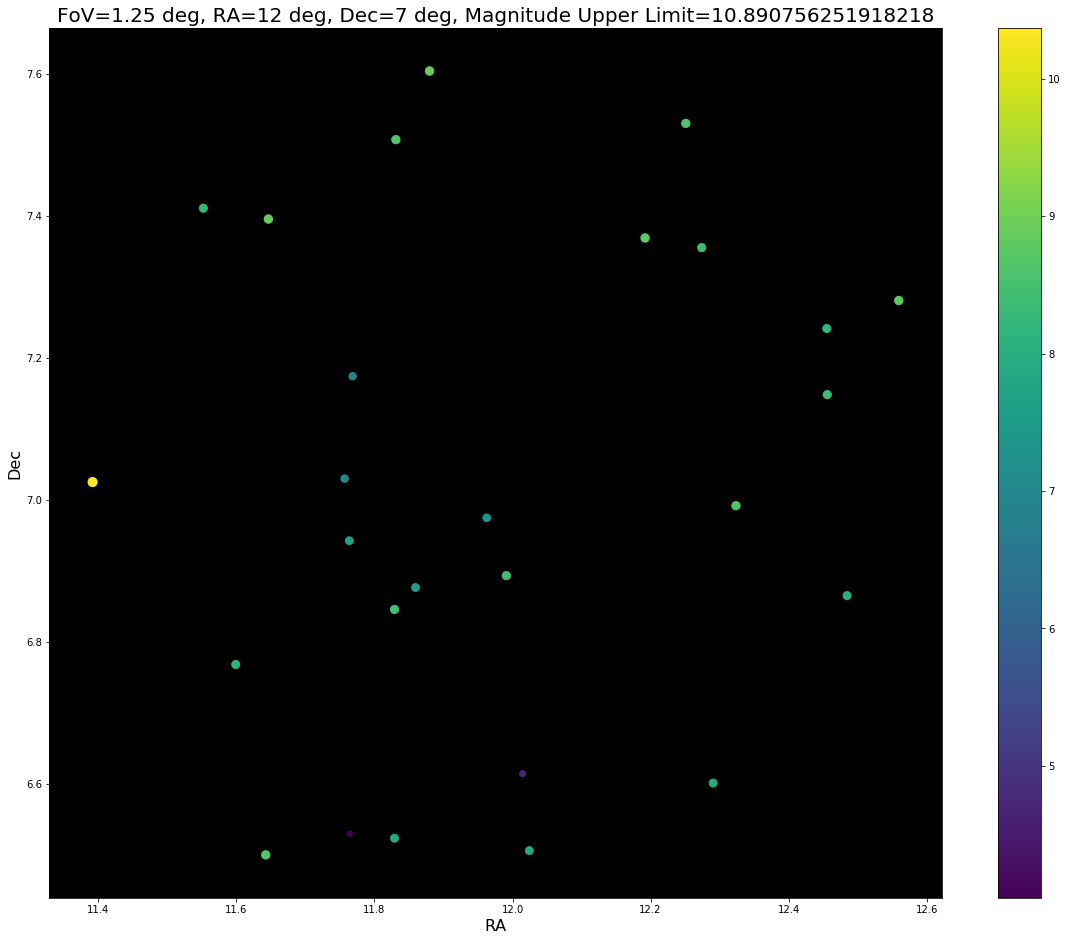

In [5]:
# Necessary imports
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.colorbar as clb

dt=pd.read_csv('hygfull.csv')

# cos(A) = sin(Decl.1)sin(Decl.2) + cos(Decl.1)cos(Decl.2)cos(RA.1 - RA.2); formula for the angular seperation

# m: magnification of telescope; afov: apparent field of view of eyepiece; D: aperture size in mm;

def starplot(ra,dec,m,afov,D):
    fov=afov/m # true field of view based on magnification and apparent fov of eye piece
    mag=2+5*np.log10(D) # limiting visual magnitude based of aperture
    x=np.pi/180
    dt["distance"]=np.arccos(np.sin(dec*x)*np.sin(dt["Dec"]*x)+np.cos(dec*x)*np.cos(dt["Dec"]*x)*np.cos(ra*x-dt["RA"]*x))*(180/np.pi)
    mag_dt= dt[(dt["Mag"]<=mag) & (dt["distance"] <=fov/2)]
    
    fig, ax = plt.subplots(figsize=(20,16))
    im=ax.scatter(mag_dt['RA'], mag_dt['Dec'], c=mag_dt["Mag"], label='Stars', s=mag_dt['Mag']*10/fov)
    # color bar on side with range (min,max) values of magnitude in the database containing just the stars of magnitude equal to or less than the limiting visual magnitude
    fig.colorbar(im, ax=ax)
    ax.set_facecolor('black')
    im.set_clim(mag_dt["Mag"].min(), mag_dt["Mag"].max())
    plt.xlabel('RA', fontsize=16)
    plt.ylabel('Dec', fontsize=16)
    plt.title(F"FoV={fov} deg, RA={ra} deg, Dec={dec} deg, Magnitude Upper Limit={mag}", fontsize=20)
    print(mag_dt["Mag"].min(), mag_dt["Mag"].max())
    
    
starplot(12,7,40,50,60)